# Aligning with seeds
Previously, the `align` module has been used in the classes `SignFlips`, `OrthogonalProcrustes`, and `SeedlessProcrustes` to align two datasets by correcting an orthogonal transformation of the data. However, it can be alternatively used with the addition of a matrix of seeds that identifies a relation between data points from said datasets. This relation can be described as a partial matching of entries between the two datasets. In this case, the calculation of Procrustes is less straight forward, as a new variable is introduced, altering the means by which $Q$ is determined in the equation $|| X Q_{SP} - P Y ||_F$.

## SeededProcrustes

`SeededProcrustes` is an algorithm that extends regular Procrustes to a case where there is a known partial correspondence between the two datasets. In this case, the two datasets are not required to have the same number of entries, seeing as the relation between the two datasets does not have to be a 1:1 pairing. `SeededProcrustes` uses the paired portion of the datasets as a sort of sample population to calculate a $Q$ value that could be accurately applied to the datasets as a whole. This $Q$ is used to minimize the formula $|| X Q_{SP} - P Y ||_F$ once an accurate $P$ value is found by plugging the found $Q$ into `SeedlessProcrustes`.

Given two datasets, $X$ and $Y$, one can assume they will have an equal number of paired indices, but it is not required for them to have the same number of total elements. The `seeds` matrix is an $n$ x 2 matrix made up of all paired indices found between the $X$ and $Y$ where $n$ corresponds to the number of pairs between $X$ and $Y$. In other words, the first column consists of indices of $X$ elements from the pairs, and the second column houses the corresponding $Y$ indices. 

In [14]:
import numpy as np
from graspologic.align import SeededProcrustes
from scipy.stats import special_ortho_group
import matplotlib.pyplot as plt

aligner = SeededProcrustes()
X = np.random.uniform(0, 1, (20, 2))
Q = special_ortho_group.rvs(2)
Y = np.random.uniform(0, 1, (30, 2)) @ Q
X_prime = np.random.uniform(0, 1, (10, 2))
Y_prime = X_prime @ Q
X_hat = np.vstack((X_prime,X))
Y_hat = np.vstack((Y_prime,Y))
X_prime_len = X_prime.shape[0]
seeds = np.arange(X_prime_len)
seeds = np.vstack((seeds,seeds)).transpose()
aligner.fit_transform(X_hat, Y_hat, seeds);

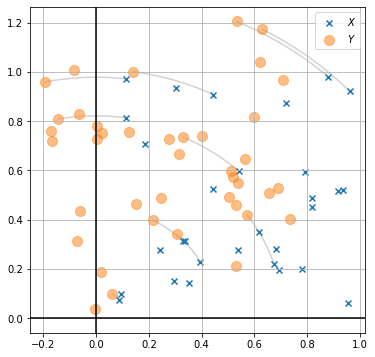

In [16]:



fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.axvline(0, color="k")
ax.axhline(0, color="k")
ax.scatter(X_hat[:,0], X_hat[:,1], label=r"$X$", marker='x')
ax.scatter(Y_hat[:,0], Y_hat[:,1], label=r"$Y$", s=100, alpha=0.5)
#ax.scatter(X_prime[:,0],X_prime[:,1],label=r"$X_{SP}$", marker='$S$')

rads_start = 0
rads_end = np.arctan2(Q[1, 0], Q[0, 0])

Zs = []
for rads in np.linspace(rads_start, rads_end, 100):
    semi_Q = np.array(
        [
            [np.cos(rads), -np.sin(rads)],
            [np.sin(rads), np.cos(rads)],
        ]
    )
    Z = X_prime @ semi_Q
    Zs.append(Z)
Zs = np.stack(Zs)

ax.plot(Zs[:, :, 0], Zs[:, :, 1], color="lightgrey", zorder=-1)

ax.legend()
ax.grid();